<a href="https://colab.research.google.com/github/jyimz/Python_Data_Projects/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Read the data
import pandas as pd
parole = pd.read_csv('/content/Parole.csv')

In [ ]:
# Summarize the data structure
parole.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Male              675 non-null    int64  
 1   RaceWhite         675 non-null    int64  
 2   Age               675 non-null    float64
 3   State             675 non-null    object 
 4   TimeServed        675 non-null    float64
 5   MaxSentence       675 non-null    int64  
 6   MultipleOffenses  675 non-null    int64  
 7   Crime             675 non-null    object 
 8   Violator          675 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 47.6+ KB


In [ ]:
# Have a look at the data. See the independent and dependent columns.
parole.head()

,Male,RaceWhite,Age,State,TimeServed,MaxSentence,MultipleOffenses,Crime,Violator
0,1,1,33.2,Other,5.5,18,0,Driving,0
1,0,1,39.7,Other,5.4,12,0,Drugs,0
2,1,0,29.5,Other,5.6,12,0,Drugs,0
3,1,1,22.4,Other,5.7,18,0,Other,0
4,1,0,21.6,Other,5.4,12,0,Other,0


In [ ]:
sum(parole['Violator'])

78

# Explore the data a bit. Can you spot some pattern to identify who is a violator?

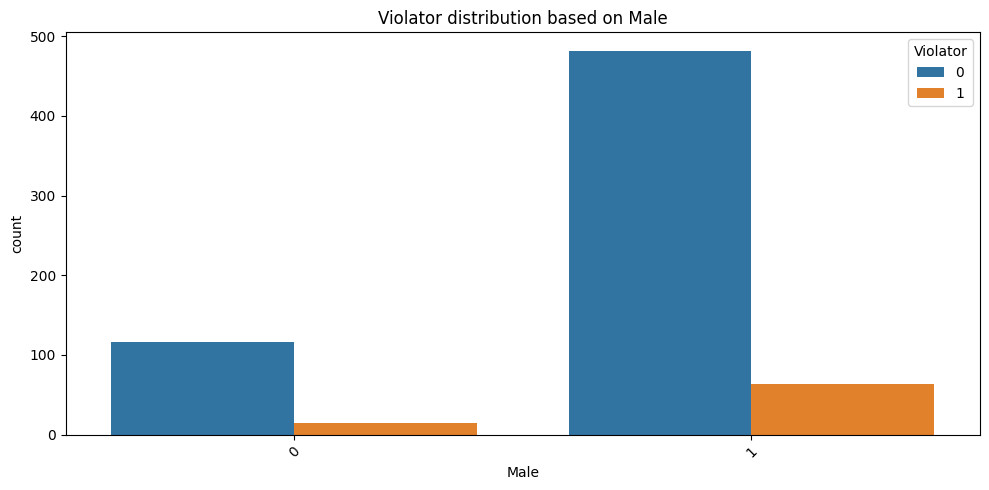

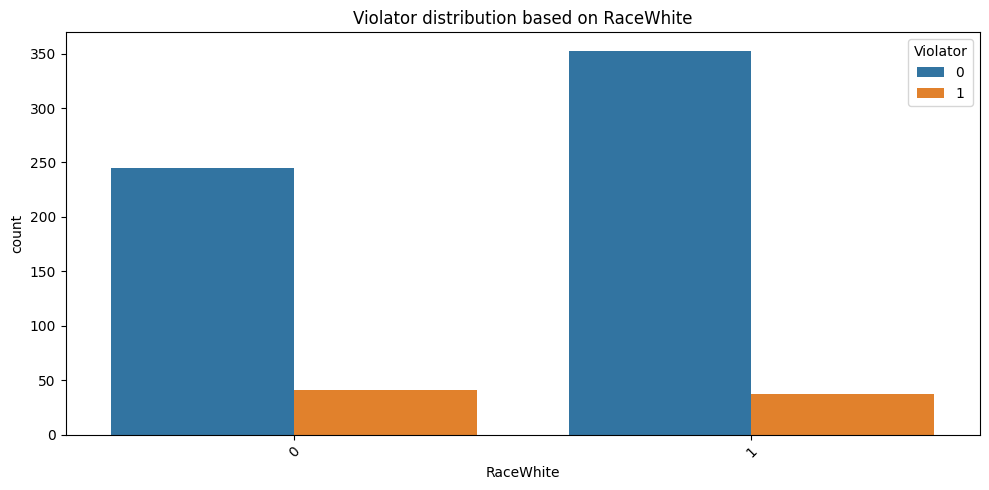

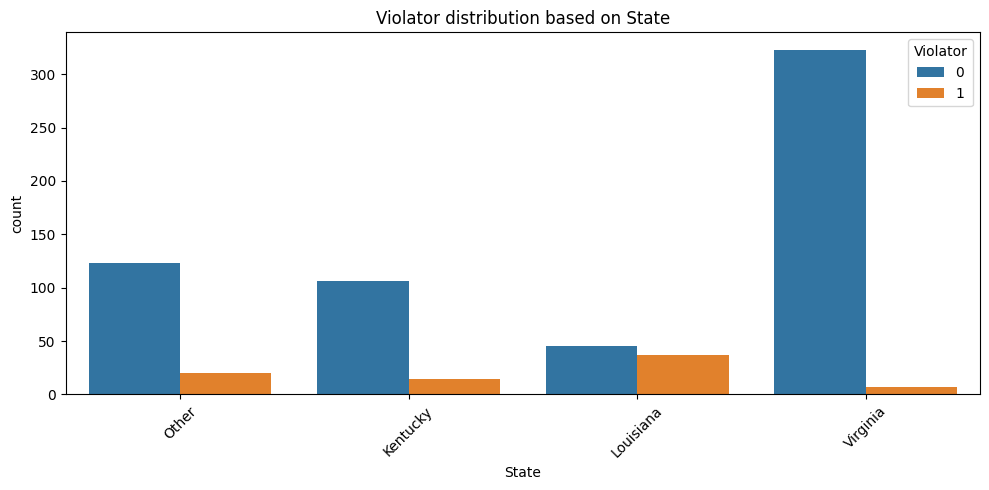

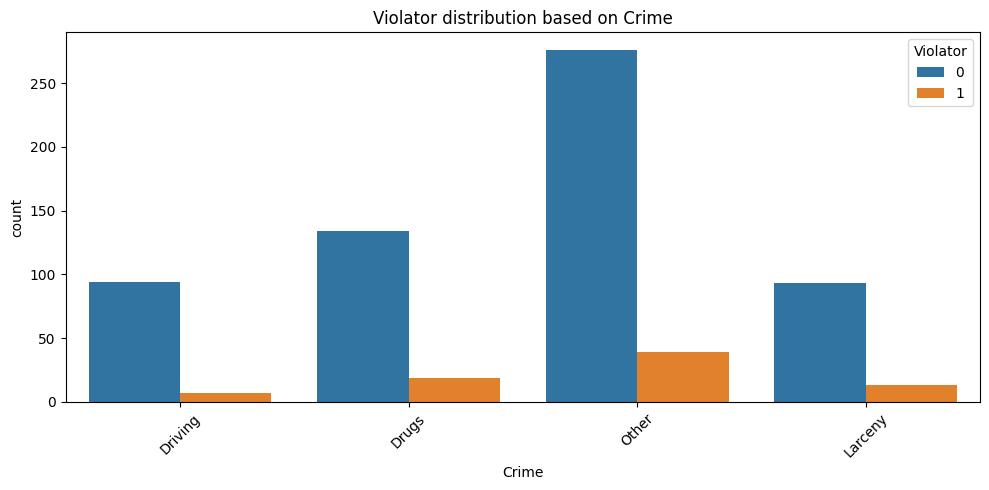

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
categorical_columns = ['Male', 'RaceWhite', 'State', 'Crime']

for column in categorical_columns:
    plt.figure(figsize=(10,5))
    sns.countplot(data=parole, x=column, hue='Violator')
    plt.title(f'Violator distribution based on {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

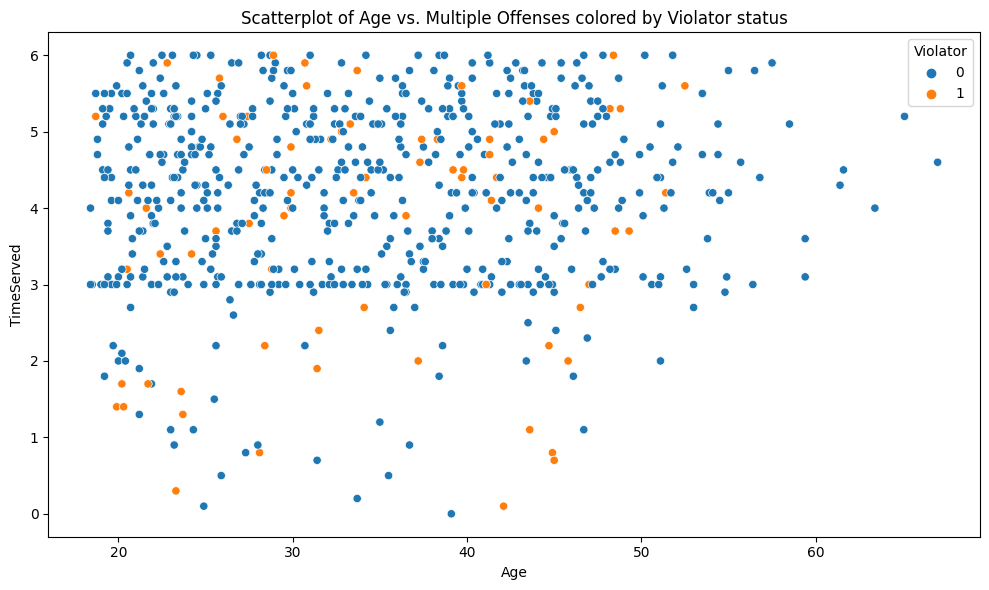

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=parole, x='Age', y='TimeServed', hue='Violator')
plt.title('Scatterplot of Age vs. Multiple Offenses colored by Violator status')
plt.tight_layout()
plt.show()

In [ ]:
parole['Male'] = parole['Male'].astype(int)
parole['RaceWhite'] = parole['RaceWhite'].astype(int)
parole['Violator'] = parole['Violator'].astype(int)
parole['MultipleOffenses'] = parole['MultipleOffenses'].astype(int)

In [ ]:
from sklearn.model_selection import train_test_split


# Specify the fraction of data you want in your training set (e.g., 0.75 for 75%)
fraction_train = 0.7

# Split the data into training and testing sets
df_train, df_test = train_test_split(parole, test_size=(1 - fraction_train), random_state=88)

print(df_train.shape[0]) # number of parameters used for training set
print(df_test.shape[0]) # number of parameters used for testing set

472
203


In [ ]:
import statsmodels.formula.api as smf

# Define the logistic regression formula using from_formula
formula = "Violator ~ Male + RaceWhite + Age + State + TimeServed + MaxSentence + MultipleOffenses + Crime"

# Fit a logistic regression model
model = smf.logit(formula, data = df_train)
LogModel_res = model.fit()

print(LogModel_res.summary())

Optimization terminated successfully.
         Current function value: 0.239043
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Violator   No. Observations:                  472
Model:                          Logit   Df Residuals:                      459
Method:                           MLE   Df Model:                           12
Date:                Sat, 28 Oct 2023   Pseudo R-squ.:                  0.3019
Time:                        01:15:48   Log-Likelihood:                -112.83
converged:                       True   LL-Null:                       -161.62
Covariance Type:            nonrobust   LLR p-value:                 1.650e-15
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.2681      1.457     -2.242      0.025      -6.125      -0.412
State

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Make predictions on both training and test sets
y_train_pred = LogModel_res.predict(df_train)
y_test_pred = LogModel_res.predict(df_test)

# Create a Pandas DataFrame for each set of predictions
train_predictions = pd.DataFrame({'Actual': df_train["Violator"], 'Predicted': (y_train_pred > 0.5).astype(int)})
test_predictions = pd.DataFrame({'Actual': df_test["Violator"], 'Predicted': (y_test_pred > 0.5).astype(int)})

# Calculate cross-tabulation tables for both training and test sets
train_cross_tab = pd.crosstab(train_predictions['Actual'], train_predictions['Predicted'], rownames=['Actual'], colnames=['Predicted'])
test_cross_tab = pd.crosstab(test_predictions['Actual'], test_predictions['Predicted'], rownames=['Actual'], colnames=['Predicted'])

print(train_cross_tab)
print(test_cross_tab)

Predicted    0   1
Actual            
0          414   7
1           35  16
Predicted    0  1
Actual           
0          170  6
1           24  3


In [ ]:
y_train = df_train["Violator"]
y_test = df_test["Violator"]

In [ ]:
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

print(roc_auc_train)
print(roc_auc_test)

0.8685669041963578
0.8268097643097643


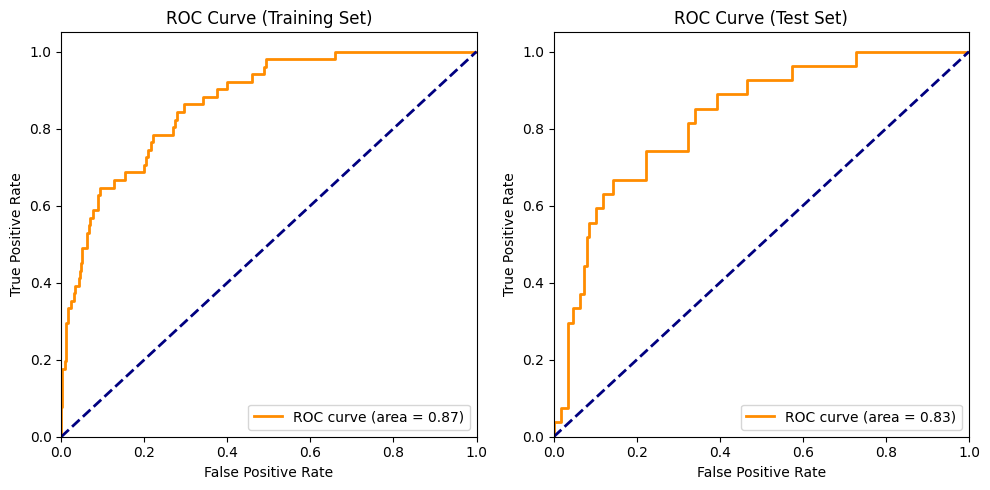

In [ ]:
import matplotlib.pyplot as plt

# Plot the ROC curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training Set)')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()